# Initialization

Connect to Google Drive:

In [11]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd '/content/drive/MyDrive/GitHub/emotion-dectection-from-text'

Preparing necessary packages (may need to add more):

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from joblib import dump, load

from preset_function import evaluate_model, draw_learning_curve, load_processed_data

X_train_bow, X_test_bow, X_train_tfidf, X_test_tfidf, X_train_bow_L1, X_test_bow_L1, X_train_tfidf_L1, X_test_tfidf_L1 = load_processed_data('input')

y_train, y_test = load_processed_data('output')

%matplotlib inline

**DEVELOPER'S NOTE: k-NN code will be the anchor code for implementing other models. Please refer to this code as a guide when you work on other classes of models. Please refer to SleepyHunter if you ever need any more preset functions, as well as when you find a bug. Regards.**

# Basic training

We define the model and train it first

In [3]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train_bow, y_train)

KNeighborsClassifier(n_neighbors=3)

Getting prediction on training set (without cross validation) then evaluate it!

Score of on train are:
	- Accuracy score: 0.8080
	- Micro F1 score: 0.8080
	- Macro F1 score: 0.8019
Score of on test are:
	- Accuracy score: 0.6895
	- Micro F1 score: 0.6895
	- Macro F1 score: 0.6793


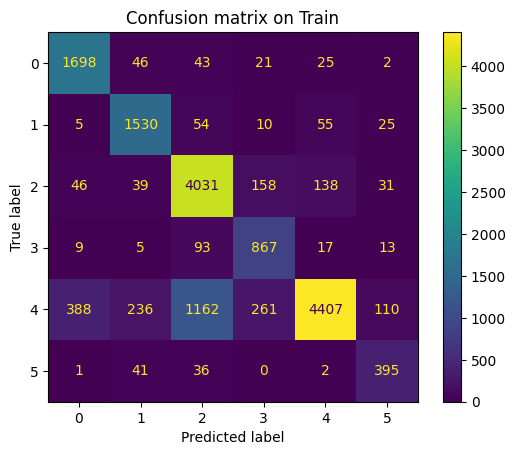

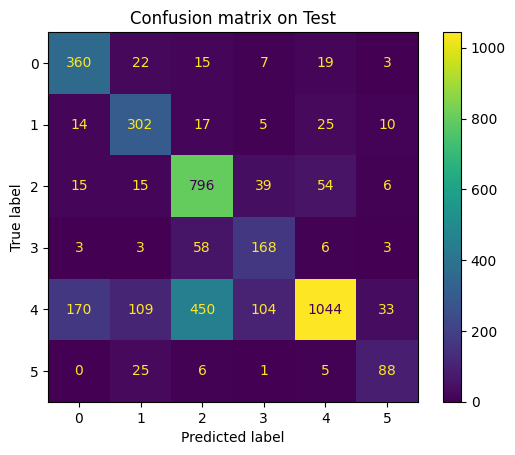

In [4]:
evaluate_model(knn_model, X_train_bow, X_test_bow, y_train, y_test, include_training = True)

Learning curve

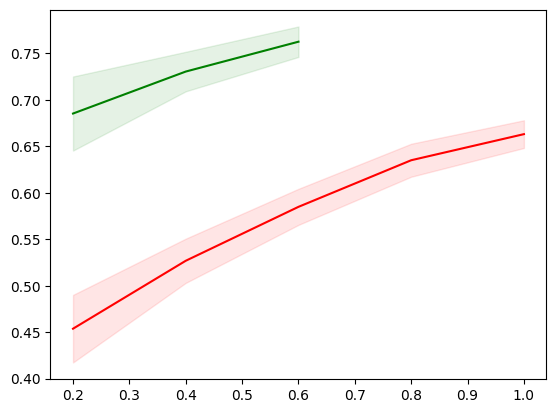

In [5]:
draw_learning_curve(knn_model, X_train_bow, y_train)

Actually I set k = 3 to beautify the record, I ran k >= 5 and it was terrible.
Now we draw the plot for a range of k-neighbors

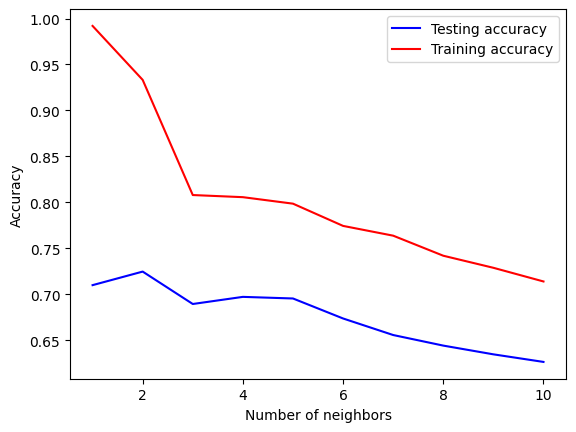

In [6]:
# Setting the hyperparameter range
K = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_list = list()
valid_accuracy_list = list()

for k in K:
  knn_model = KNeighborsClassifier(n_neighbors = k)
  knn_model.fit(X_train_bow, y_train)

  data_pred_y = knn_model.predict(X_test_bow)
  data_valid_y = knn_model.predict(X_train_bow)

  accuracy_list.append([k, accuracy_score(y_test, data_pred_y)])
  valid_accuracy_list.append([k, accuracy_score(y_train, data_valid_y)])

accuracy_list = np.asarray(accuracy_list)
valid_accuracy_list = np.asarray(valid_accuracy_list)

plt.plot(accuracy_list[:, 0], accuracy_list[:, 1], label = "Testing accuracy", color = 'b')
plt.plot(valid_accuracy_list[:, 0], valid_accuracy_list[:, 1], label = "Training accuracy", color = 'r')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Model evaluation

We'll evaluate models based on different datasets

1. BoW - Normal Dataset

In [20]:
dict_param = {'n_neighbors': np.arange(1, 51),
              'p': np.arange(1, 3),
              'weights': ['uniform', 'distance']}
best_knn_model = GridSearchCV(KNeighborsClassifier(), param_grid = dict_param, n_jobs = 8, cv = 10, scoring = 'accuracy')

best_knn_model.fit(X_train_bow, y_train)

print("Best parameters for k_NN on BoW - Normal Dataset:", best_knn_model.best_params_)
data_best_knn_pred_y = best_knn_model.predict(X_test_bow)
print("Accuracy of that model:", accuracy_score(data_best_knn_pred_y, y_test))

Best parameters for k_NN on BoW - Normal Dataset: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Accuracy of that model: 0.732


2. TF-IDF - Normal Dataset

In [21]:
dict_param = {'n_neighbors': np.arange(1, 51),
              'p': np.arange(1, 3),
              'weights': ['uniform', 'distance']}
best_knn_model = GridSearchCV(KNeighborsClassifier(), param_grid = dict_param, n_jobs = 8, cv = 10, scoring = 'accuracy')

best_knn_model.fit(X_train_tfidf, y_train)

print("Best parameters for k_NN on TF-IDF - Normal Dataset:", best_knn_model.best_params_)
data_best_knn_pred_y = best_knn_model.predict(X_test_tfidf)
print("Accuracy of that model:", accuracy_score(data_best_knn_pred_y, y_test))

Best parameters for k_NN on TF-IDF - Normal Dataset: {'n_neighbors': 24, 'p': 2, 'weights': 'uniform'}
Accuracy of that model: 0.8395


3. BoW - L1-altered dataset

In [19]:
dict_param = {'n_neighbors': np.arange(1, 51),
              'p': np.arange(1, 3),
              'weights': ['uniform', 'distance']}
best_knn_model = GridSearchCV(KNeighborsClassifier(), param_grid = dict_param, n_jobs = 8, cv = 10, scoring = 'accuracy')

best_knn_model.fit(X_train_bow_L1, y_train)

print("Best parameters for k_NN on BoW - L1-altered Dataset:", best_knn_model.best_params_)
data_best_knn_pred_y = best_knn_model.predict(X_test_bow_L1)
print("Accuracy of that model:", accuracy_score(data_best_knn_pred_y, y_test))

Best parameters for k_NN on BoW - L1-altered Dataset: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Accuracy of that model: 0.7805


4. TF-IDF - L1-altered dataset

In [18]:
dict_param = {'n_neighbors': np.arange(1, 51),
              'p': np.arange(1, 3),
              'weights': ['uniform', 'distance']}
best_knn_model = GridSearchCV(KNeighborsClassifier(), param_grid = dict_param, n_jobs = 8, cv = 10, scoring = 'accuracy')

best_knn_model.fit(X_train_tfidf_L1, y_train)

print("Best parameters for k_NN on TF-IDF - L1-altered Dataset:", best_knn_model.best_params_)
data_best_knn_pred_y = best_knn_model.predict(X_test_tfidf_L1)
print("Accuracy of that model:", accuracy_score(data_best_knn_pred_y, y_test))

Best parameters for k_NN on TF-IDF - L1-altered Dataset: {'n_neighbors': 40, 'p': 2, 'weights': 'distance'}
Accuracy of that model: 0.83175


## Conclusion
From the above observations, it can be easily seen that:
- Comparing to BoW datasets, models running on TF-IDF datasets tends to cost less time and have significantly better performance
- Comparing to originally-filtered datasets, L1-altered datasets have less execution time, with the difference between accuracy being negatable.
- TF-IDF datasets tends to product "strange" patterns of the mbest kNN method, which will be delved deeper as a part of our project. Here, we choose the models working on TF-IDF Original Dataset.

# Export models

In [18]:
directory = "data/models/"

dump(best_knn_model, directory + "best_knn_model.joblib")

['data/models/best_knn_model.joblib']